In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("bill_authentication.csv")
data.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
data.shape

(1372, 5)

In [4]:
features=["Variance","Skewness","Curtosis","Entropy"]

In [5]:
x=data[features]
x

,Variance,Skewness,Curtosis,Entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [6]:
y=data["Class"]
y

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: Class, Length: 1372, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

In [8]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x, y)

GaussianNB()

In [9]:
y_pred=model.predict(x_test)

In [10]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.8472727272727273

# Case Study
Human activity recognition research has traditionally focused on discriminating between different activities, i.e. to predict "which" activity was performed at a specific point in time (like Sitting, Standing, Running, etc...).

On the other hand the Weight Lifting Exercises dataset helps to investigate "how (well)" an activity was performed by the wearer. The "how (well)" investigation has only received little attention so far, even though it potentially provides useful information for a large variety of applications, such as sports training.

Six young health participants were asked to perform one set of 10 repetitions of the Unilateral Dumbbell Biceps Curl in five different fashions: exactly according to the specification (Class A), throwing the elbows to the front (Class B), lifting the dumbbell only halfway (Class C), lowering the dumbbell only halfway (Class D) and throwing the hips to the front (Class E).

Class A corresponds to the specified execution of the exercise, while the other 4 classes correspond to common mistakes. Participants were supervised by an experienced weight lifter to make sure the execution complied to the manner they were supposed to simulate. The exercises were performed by six male participants aged between 20-28 years, with little weight lifting experience.

In [11]:
# Import packages
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;
import pandas.util.testing as tm

<ipython-input-11-e557b85d4332>:9: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [12]:
# Import data
training = pd.read_csv("har_train.txt")
training.head()

,classe,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,...,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
0,A,1.41,8.07,-94.4,3,0.00,0.0,-0.02,-21,4,...,36,0.03,0.00,-0.02,192,203,-215,-17,654,476
1,A,1.41,8.07,-94.4,3,0.02,0.0,-0.02,-22,4,...,36,0.02,0.00,-0.02,192,203,-216,-18,661,473
2,A,1.42,8.07,-94.4,3,0.00,0.0,-0.02,-20,5,...,36,0.03,-0.02,0.00,196,204,-213,-18,658,469
3,A,1.48,8.05,-94.4,3,0.02,0.0,-0.03,-22,3,...,36,0.02,-0.02,0.00,189,206,-214,-16,658,469
4,A,1.45,8.06,-94.4,3,0.02,0.0,-0.02,-21,4,...,36,0.02,-0.02,-0.03,193,203,-215,-9,660,478


In [13]:
test =  pd.read_csv("har_validate.txt")
test.head()

,classe,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,...,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
0,A,1.48,8.07,-94.4,3,0.02,0.02,-0.02,-21,2,...,36,0.02,0.00,-0.02,189,206,-214,-17,655.0,473.0
1,A,1.45,8.17,-94.4,3,0.03,0.00,0.00,-21,4,...,36,0.02,0.00,-0.02,190,205,-215,-22,656.0,473.0
2,A,1.42,8.21,-94.4,3,0.02,0.00,-0.02,-22,4,...,36,0.00,-0.02,-0.03,193,202,-214,-14,659.0,478.0
3,A,1.48,8.15,-94.4,3,0.00,0.00,0.00,-21,4,...,36,0.02,0.00,0.00,194,204,-215,-13,656.0,471.0
4,A,1.51,8.12,-94.4,3,0.00,0.00,-0.02,-21,4,...,36,0.02,-0.02,0.00,192,204,-213,-13,653.0,481.0


In [14]:
print(training.shape)
print(test.shape)

(13737, 53)
(5885, 53)


In [15]:
# Create the X and Y
## Data preparation step
x_train=training.drop("classe",axis=1)
y_train=training["classe"]

x_test=test.drop("classe",axis=1)
y_test=test["classe"]

In [16]:
# Init the Gaussian Classifier
model = GaussianNB()
model

GaussianNB()

In [17]:
# Train the model
model.fit(x_train, y_train)

# Predict Output 
y_pred = model.predict(x_test)
print(y_pred)

['A' 'A' 'A' ... 'E' 'E' 'E']


Text(83.40000000000006, 0.5, 'Predicted')

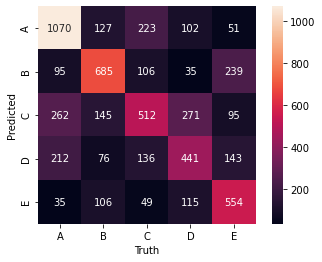

In [18]:
mat = confusion_matrix(y_pred, y_test)

names = np.unique(y_pred)

sns.heatmap(mat, square=True,  annot=True,fmt='d', cbar=True, 
            xticklabels=names, yticklabels=names)

plt.xlabel('Truth')
plt.ylabel('Predicted')

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  

print(confusion_matrix(y_test, y_pred))  

[[1070   95  262  212   35]
 [ 127  685  145   76  106]
 [ 223  106  512  136   49]
 [ 102   35  271  441  115]
 [  51  239   95  143  554]]


In [20]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           A       0.68      0.64      0.66      1674
           B       0.59      0.60      0.60      1139
           C       0.40      0.50      0.44      1026
           D       0.44      0.46      0.45       964
           E       0.64      0.51      0.57      1082

    accuracy                           0.55      5885
   macro avg       0.55      0.54      0.54      5885
weighted avg       0.57      0.55      0.56      5885



In [21]:
print(accuracy_score(y_test, y_pred))

0.5542905692438402


In [25]:
# Check on Bernoulli Classifier
modelB = BernoulliNB()

# Train the model
modelB.fit(x_train, y_train) 

# Predict Output 
y_predB = modelB.predict(x_test)
y_predB

array(['A', 'A', 'A', ..., 'E', 'E', 'E'], dtype='<U1')

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  

print(confusion_matrix(y_test, y_predB))  

print(classification_report(y_test, y_predB)) 

print(accuracy_score(y_test, y_predB))

[[1001  240  215  114  104]
 [ 253  486  126  112  162]
 [ 316  157  406   53   94]
 [  75  239  193  311  146]
 [ 116  210  183  157  416]]
              precision    recall  f1-score   support

           A       0.57      0.60      0.58      1674
           B       0.36      0.43      0.39      1139
           C       0.36      0.40      0.38      1026
           D       0.42      0.32      0.36       964
           E       0.45      0.38      0.42      1082

    accuracy                           0.45      5885
   macro avg       0.43      0.43      0.43      5885
weighted avg       0.45      0.45      0.44      5885

0.44519966015293116


In [28]:
# Bernoulli should not be applied for this dataset since it is meant for binary.
# Therefore, Gaussian would be a good fit.